# ML Course 1 - Practice (subject)

## Import libraries

Better to do it before any further work.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Original data set

<center> <img src="titanic.png" width=400/> </center>


*On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.*

You can have a quick view on the original data set, but keep in mind that you will not have to work on this exact version today.

In [4]:
dataset = pd.read_csv('Titanic.csv')

In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD,Deck,Child,Mother
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,Braund_2,small,NaN,Adult,Not Mother
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2,small,C,Adult,Not Mother
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1,singleton,NaN,Adult,Not Mother
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2,small,C,Adult,Not Mother
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,Allen_1,singleton,NaN,Adult,Not Mother


## Simplified data set

To start will a more simple date set, we provide a simplified version of the Titanic data set with only the following variables:

| Variable | Definition | Key |
|---|---|---|
| Embarked | Port of Embarkation | 0 = Cherbourg, 1 = Queenstown, 2 = Southampton |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Fare | Passenger fare |  |
| Sex | Sex | 0 = male, 1 = female |
| Age | Age in years |  |
| Survived | Survival | 0 = No, 1 = Yes |

In [121]:
orginal_dataset = pd.read_csv('titanic_simplified.csv')
dataset = orginal_dataset.copy()
dataset['Sex'] = ["Male" if i==0 else "Female" for i in dataset['Sex']]
dataset['Survived'] = ["Yes" if i==1 else "No" for i in dataset['Survived']]
dataset["Pclass"].replace({1: "1st", 2: "2nd", 3:"3rd"}, inplace=True)
dataset["Embarked"].replace({0: "Cherbourg", 1: "Queenstown", 2:"Southampton"}, inplace=True)
dataset

,Embarked,Pclass,Fare,Sex,Age,Survived
0,Southampton,3rd,7.2500,Male,22.0,No
1,Cherbourg,1st,71.2833,Female,38.0,Yes
2,Southampton,3rd,7.9250,Female,26.0,Yes
3,Southampton,1st,53.1000,Female,35.0,Yes
4,Southampton,3rd,8.0500,Male,35.0,No
...,...,...,...,...,...,...
886,Southampton,2nd,13.0000,Male,27.0,No
887,Southampton,1st,30.0000,Female,19.0,Yes
888,Southampton,3rd,23.4500,Female,18.0,No
889,Cherbourg,1st,30.0000,Male,26.0,Yes


Your mission is to explore the data set and extract some information to answer this open question:
**“what sorts of people were more likely to survive?”**

Here are some computations to do on the data set (you are free to make extra tests and exploration on your own):
* General information:
 * Number of passengers
 * Mean age of the passengers
 * Number of passengers above 70 years old
 * Proportion of each class of passenger
 * Age distribution of the passengers depending on the port of embarkment (density plots)
 * Fare vs. age (scatter plot)
* Information linked to survival:
 * Age distribution of the passengers who survided/did not survive (histogram)
 * Repartition of survivals among men and women (stacked bars)
 * Repartition of survivals for each class (stacked bars)
 
How do you interpret the results of your exploration?

In [78]:
dataset.head()

,Embarked,Pclass,Fare,Sex,Age,Survived
0,2,3,7.2500,Male,22.0,No
1,0,1,71.2833,Female,38.0,Yes
2,2,3,7.9250,Female,26.0,Yes
3,2,1,53.1000,Female,35.0,Yes
4,2,3,8.0500,Male,35.0,No


In [112]:
dataset.describe()

,Embarked,Fare,Age
count,891.000000,891.000000,891.000000
mean,1.531987,32.204208,29.789192
std,0.794531,49.693429,14.384534
min,0.000000,0.000000,0.420000
25%,1.000000,7.910400,21.000000
50%,2.000000,14.454200,28.000000
75%,2.000000,31.000000,38.000000
max,2.000000,512.329200,80.000000


### Number of passengers

In [13]:
len(dataset)

891

### Mean age of the passengers

In [80]:
dataset['Age'].mean()

29.789191919191918

### Number of passengers above 70 years old

In [39]:
len(dataset[dataset['Age'] > 70])

8

### Proportion of each class of passenger

In [83]:
dataset.groupby(by="Pclass").size()

Pclass
1st    216
2nd    184
3rd    491
dtype: int64

### Age distribution of the passengers depending on the port of embarkment

Embarked
Cherbourg      AxesSubplot(0.125,0.125;0.775x0.755)
Queenstown     AxesSubplot(0.125,0.125;0.775x0.755)
Southampton    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

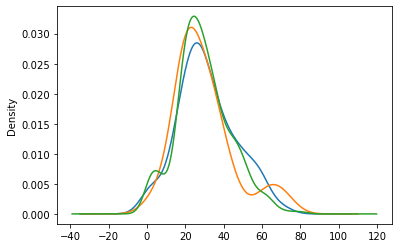

In [122]:
dataset.groupby(by="Embarked")["Age"].plot(kind='density')

### Fare vs. age (scatter plot)

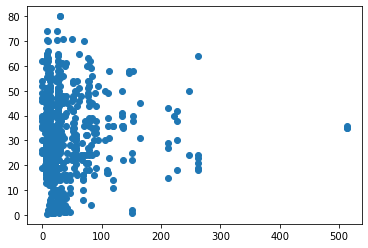

In [107]:
plt.scatter(dataset['Fare'], dataset['Age'])

### Age distribution of the passengers who survided/did not survive

<AxesSubplot:>

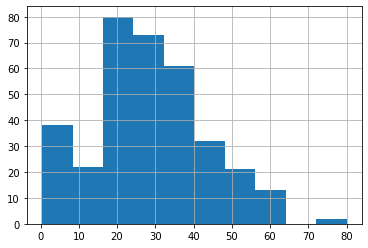

In [125]:
dataset[dataset['Survived'] == 'Yes']['Age'].hist()

<AxesSubplot:>

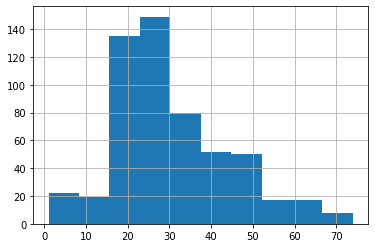

In [126]:
dataset[dataset['Survived'] == 'No']['Age'].hist()

### Repartition of survivals among men and women

<AxesSubplot:xlabel='Survived'>

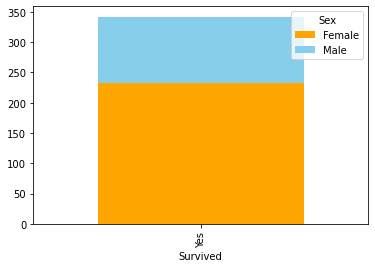

In [86]:
df_plot= dataset[dataset.Survived == 'Yes'].groupby(['Survived','Sex']).size().reset_index().pivot(index='Survived', columns='Sex', values=0)
df_plot.plot(kind='bar', stacked=True, color=['orange', 'skyblue'], width=0.8)

### Repartition of survivals for each class

<AxesSubplot:xlabel='Survived'>

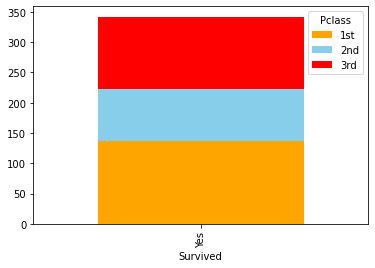

In [124]:
df_plot= dataset[dataset.Survived == 'Yes'].groupby(['Survived','Pclass']).size().reset_index().pivot(index='Survived', columns='Pclass', values=0)
df_plot.plot(kind='bar', stacked=True, color=['orange', 'skyblue', 'red'], width=0.8)

### How do you interpret the results of your exploration?
1. More number of women had survived as compare to men.
2. There is no relationship between Fare and Age.
3. Majority of Survived people has the age range of approx 18-40. It means age range 18-40 has higher density population.
4. Age has played role on survival of the people.

### what sorts of people were more likely to survive?
1. Women has higher proportion of survival
2. Women staying in first class has high proportion of survival